In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import scikit-learn tools for machine learning

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'breast-cancer-wisconsin-data', 'data.csv')

In [3]:
data = pd.read_csv(DATA_DIR)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# let's see what columns do we have in dataset
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#Extract target feature that is 'diagnosis'
target = data['diagnosis']

#Drop features that we don't need: target, id, Unnamed:32
x = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])

In [7]:
x.shape

(569, 30)

Number of Benign :  357
Number of Malignant :  212


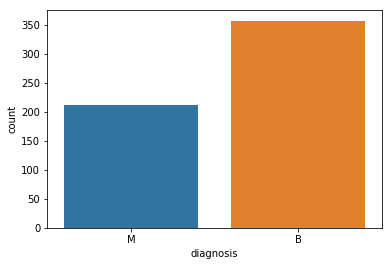

In [8]:
ax = sns.countplot(target, label='Counts')
B, M = target.value_counts()
print('Number of Benign : ', B)
print('Number of Malignant : ', M)

In [9]:
data_dia = target
data = x
data_n_2 = (data - data.mean())/data.std()

               
               

In [22]:
def swarm_violin_and_box(start_col, end_col, plot_type, size=8):
    data = pd.concat([target, data_n_2.iloc[:, start_col:end_col]], axis=1)
    data = pd.melt(data, id_vars='diagnosis',
               var_name='features',
               value_name='value')
    plt.figure(figsize=(size, size))
    if plot_type == 'violin':
        sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
        plt.xticks(rotation=90)
    if plot_type == 'box':
        sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
        plt.xticks(rotation=90)
    if plot_type =='swarm':
        sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
        plt.xticks(rotation=90)
        
        

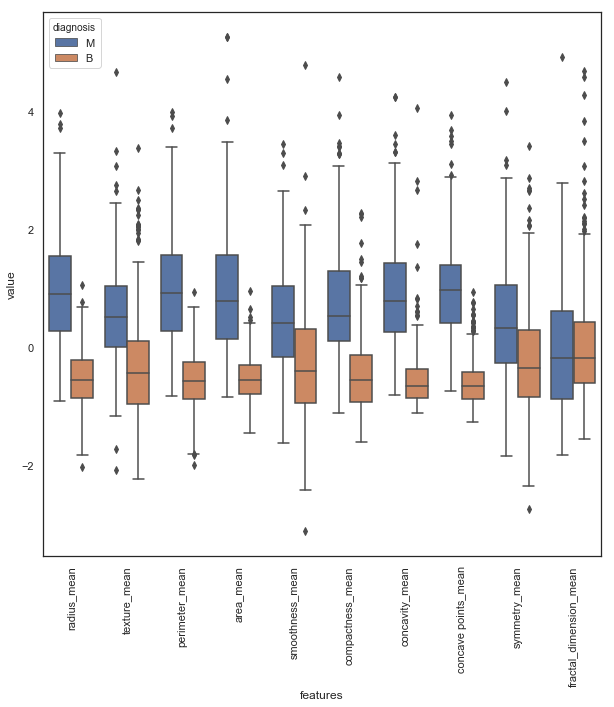

In [23]:
swarm_violin_and_box(0, 10, "box", size=10)

The medians of Malignant and Benign in all features except fractal_dimension_mean looks separate. So fractal_dimension_mean feature can't distinguish two groups and give good information for classification.

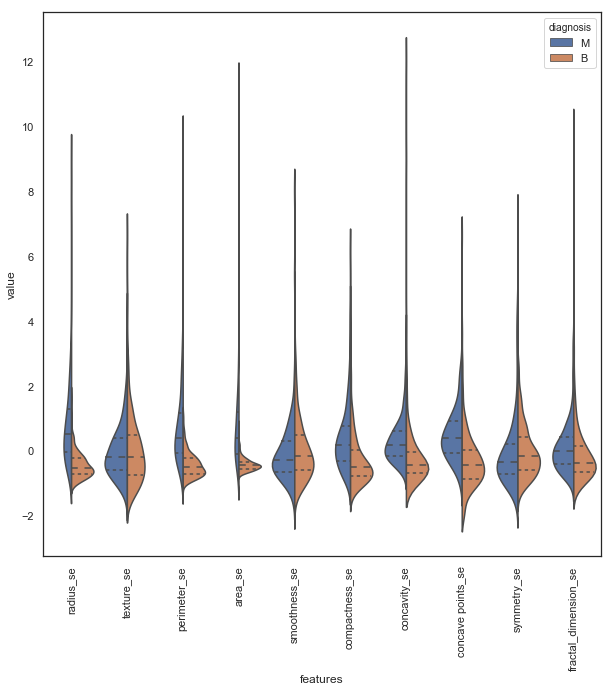

In [24]:
swarm_violin_and_box(10, 20, 'violin', size=10)

In this graph we can say same thing about texture_se, smoothness_se, symmetry_se.

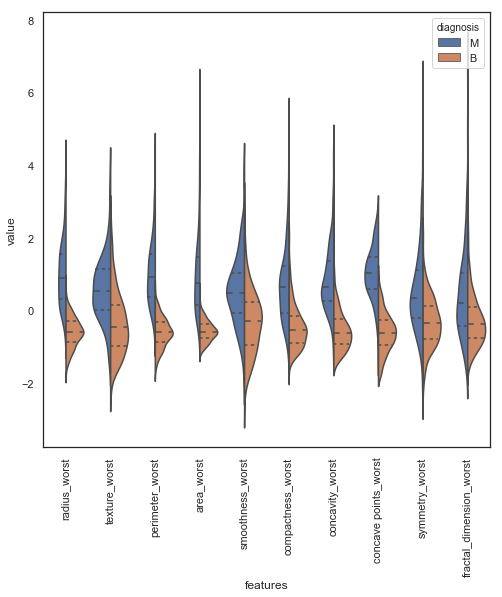

In [25]:
swarm_violin_and_box(20, 31, 'violin')

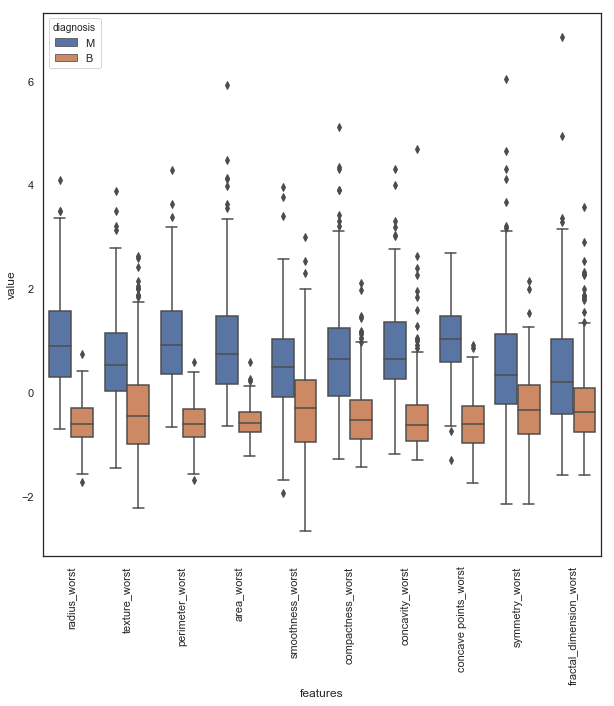

In [27]:
swarm_violin_and_box(20, 31, 'box', size=10)

C:\Users\taras\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


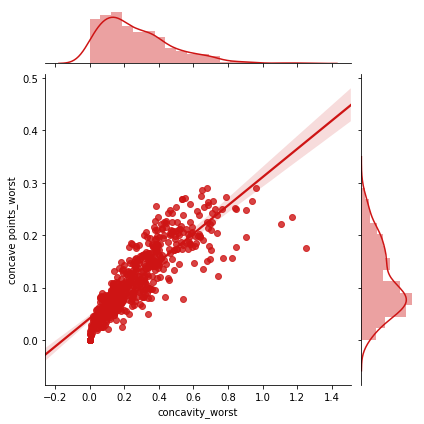

In [15]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")


As we see in the graf above 'concavity_worst' and 'concave points_worst' are highly correlated

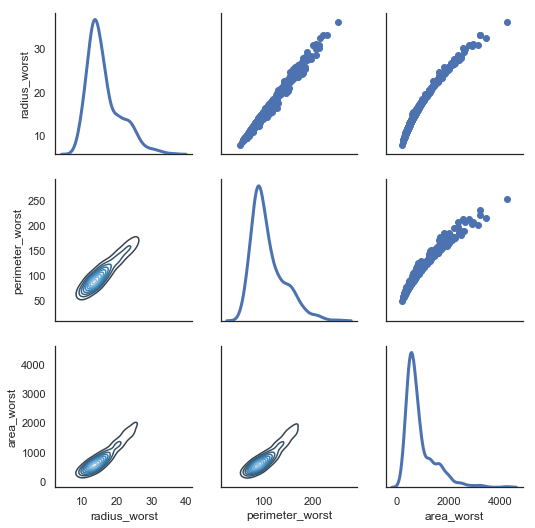

In [16]:
sns.set(style='white')
g = sns.PairGrid(x, diag_sharey=False, vars=['radius_worst', 'perimeter_worst', 'area_worst'])
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

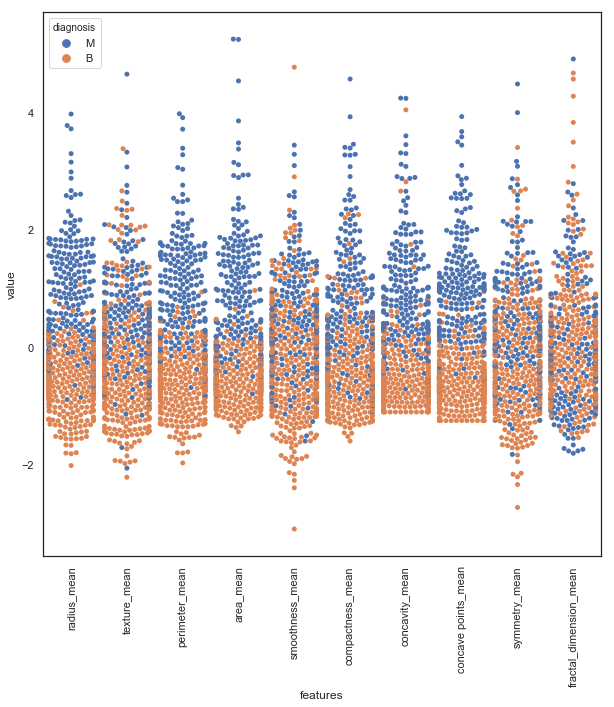

In [28]:
swarm_violin_and_box(0, 10, 'swarm', size=10)

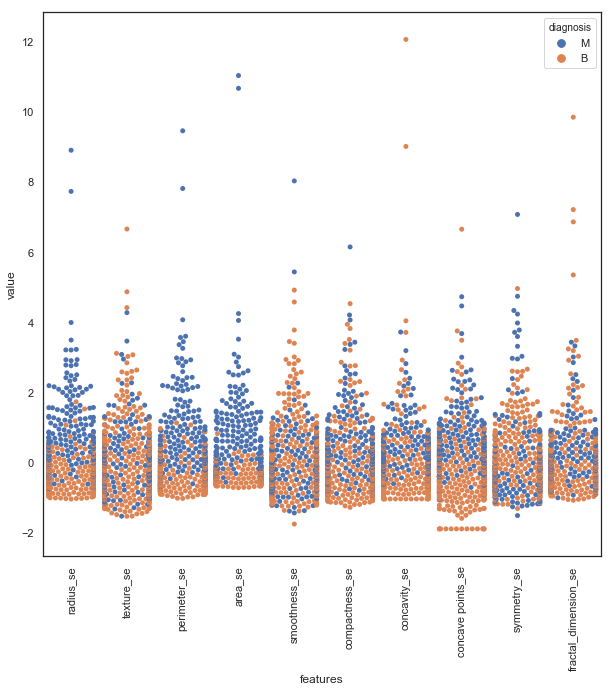

In [29]:
swarm_violin_and_box(10, 20, 'swarm', size=10)

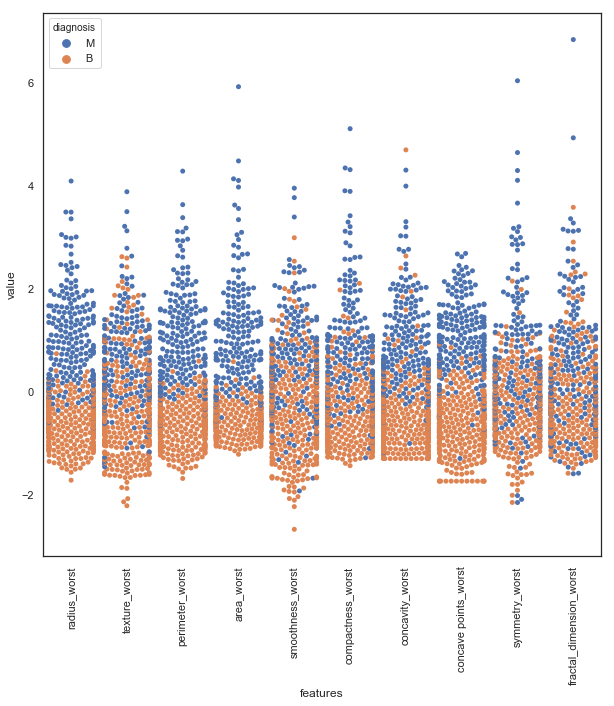

In [30]:
swarm_violin_and_box(20, 30, 'swarm', size=10)

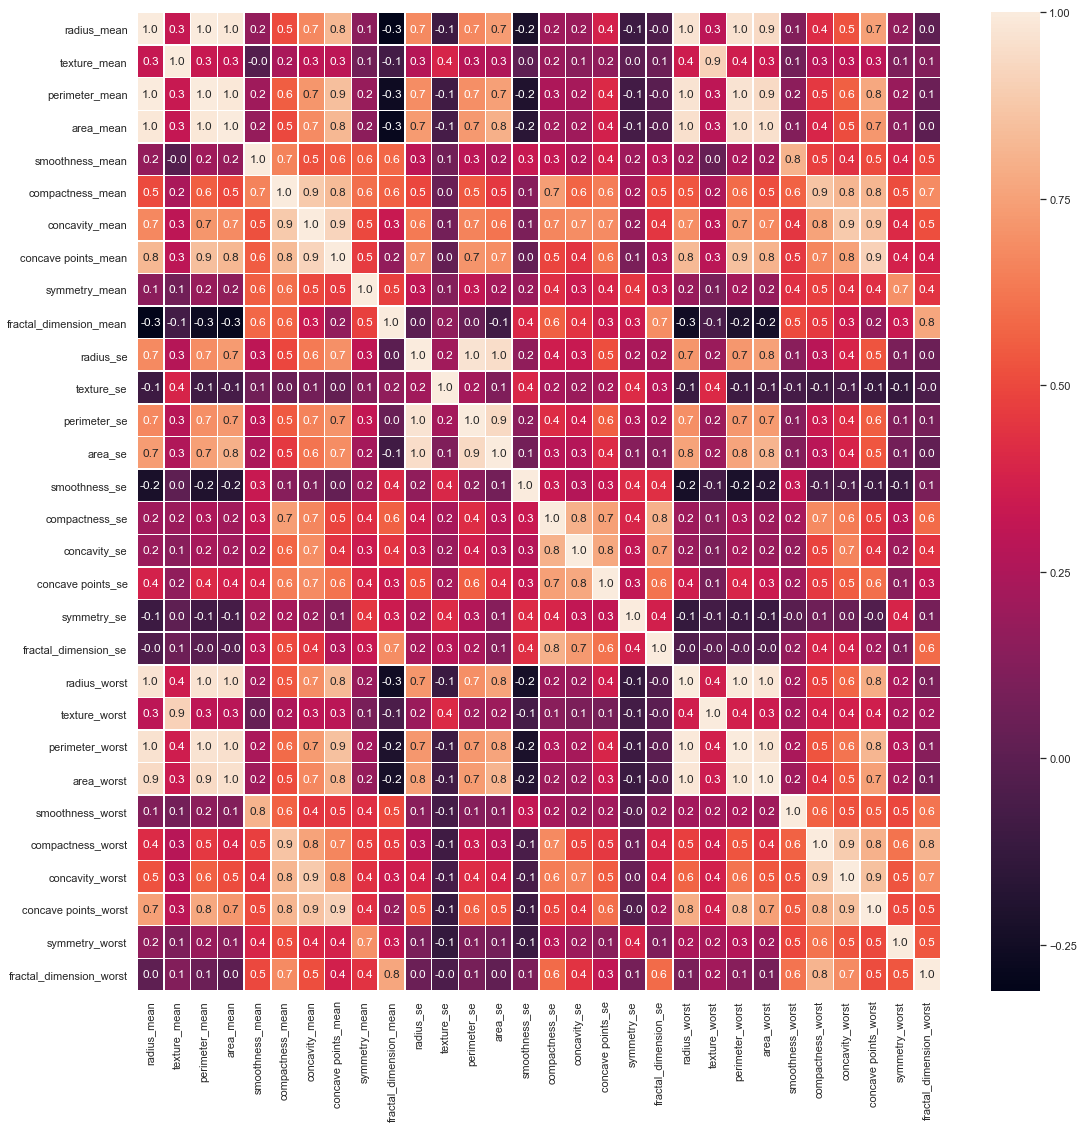

In [31]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [41]:
corr_matr = x.corr()
upper = corr_matr.where(np.triu(np.ones(corr_matr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.88) ]
to_drop

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

In [50]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

In [51]:
x_1 = x.drop(columns=drop_list)

In [52]:
x_1.shape

(569, 16)

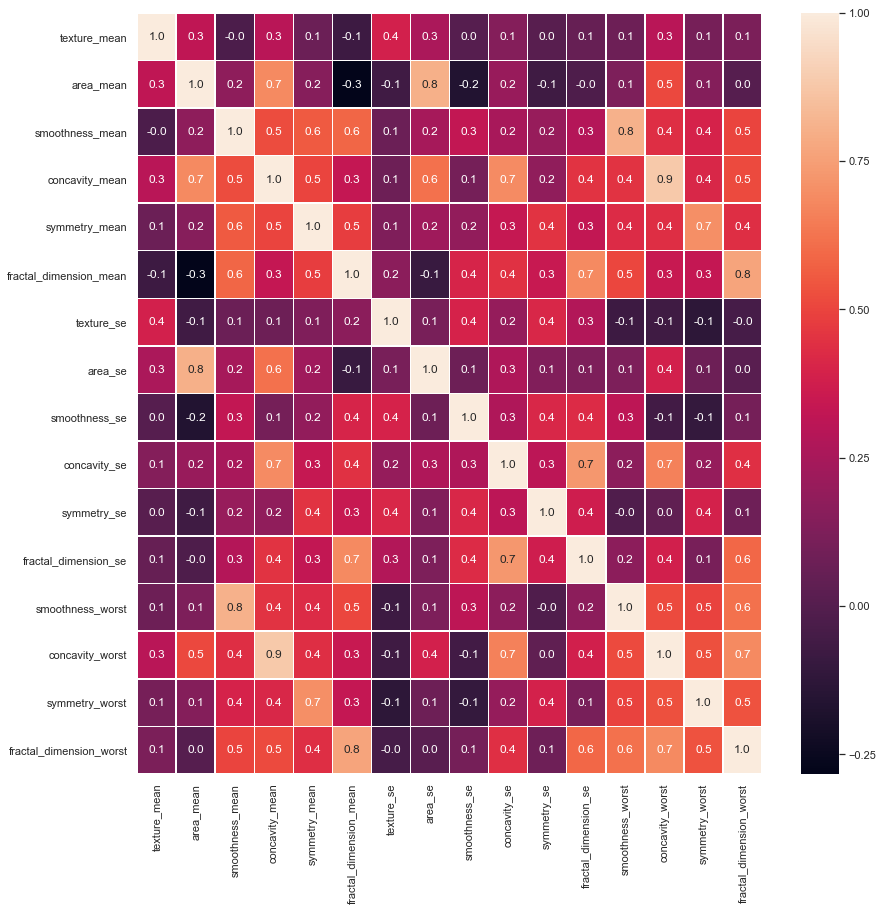

In [53]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_1, target, test_size=0.3, random_state=42)

Accuracy:  0.9532163742690059


C:\Users\taras\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


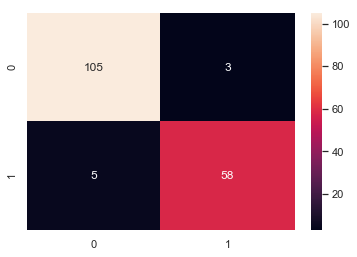

In [55]:
clf_rf = RandomForestClassifier(random_state=43)
clf_rf.fit(x_train, y_train)
ac = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy: ', ac)
conf_matrix = confusion_matrix(y_test, clf_rf.predict(x_test))
sns.heatmap(conf_matrix, annot=True, fmt="d")

1. feature 13 (0.226031)
2. feature 3 (0.190574)
3. feature 7 (0.166208)
4. feature 1 (0.152109)
5. feature 9 (0.058112)
6. feature 5 (0.031488)
7. feature 8 (0.029867)
8. feature 12 (0.027057)
9. feature 2 (0.024540)
10. feature 14 (0.019872)
11. feature 10 (0.017716)
12. feature 15 (0.016648)
13. feature 0 (0.016255)
14. feature 4 (0.009470)
15. feature 11 (0.007685)
16. feature 6 (0.006368)


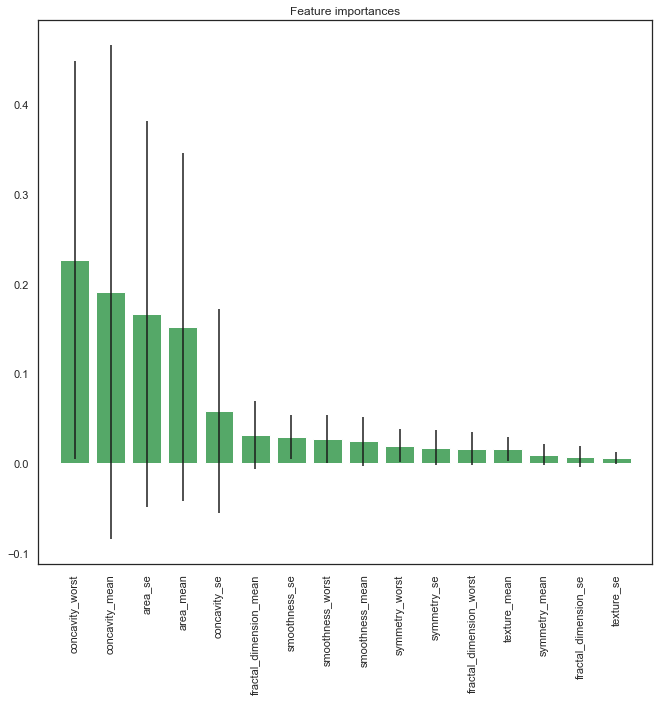

In [69]:
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(11, 10))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()